## LeNet

In [ ]:
!pip install d2l

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
import torch 
from torch import nn
from d2l import torch as d2l


In [ ]:
class Reshape(torch.nn.Module):
  def forward(self,x):
    return x.view(-1,1,28,28)
  
net = torch.nn.Sequential(
    Reshape(),
    nn.Conv2d(1,6,kernel_size=5,padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Flatten(),
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,84),
    nn.Sigmoid(),
    nn.Linear(84,10) 
    )

In [ ]:
# 检查模型

X=torch.rand(size=(1,1,28,28),dtype=torch.float32)
for layer in net:
  X=layer(X)
  print(layer.__class__.__name__,"output shape：\t",X.shape)

Reshape output shape：	 torch.Size([1, 1, 28, 28])
Conv2d output shape：	 torch.Size([1, 6, 28, 28])
Sigmoid output shape：	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape：	 torch.Size([1, 6, 14, 14])
Conv2d output shape：	 torch.Size([1, 16, 10, 10])
Sigmoid output shape：	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape：	 torch.Size([1, 16, 5, 5])
Flatten output shape：	 torch.Size([1, 400])
Linear output shape：	 torch.Size([1, 120])
Sigmoid output shape：	 torch.Size([1, 120])
Linear output shape：	 torch.Size([1, 84])
Sigmoid output shape：	 torch.Size([1, 84])
Linear output shape：	 torch.Size([1, 10])


In [ ]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size=batch_size)


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw




Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid poten

In [ ]:
def evaluate_accuracy_gpu(net, data_iter, device=None):  
    """使用GPU计算模型在数据集上的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(d2l.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [ ]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """Train a model with a GPU (defined in Chapter 6)."""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = d2l.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = d2l.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], d2l.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

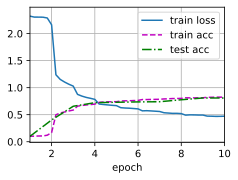

In [ ]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [ ]:
import torch 
from torch import nn

class Reshape(nn.Module):
  def __init(self):
    super(Reshape,self).__init__()

  def forward(self,X):
    return torch.reshape(X,(-1,1,28,28))

class Lenet(nn.Module):
  def __init__(self):
    super(Lenet,self).__init__()
    self.Reshape = Reshape()
    self.Conv1 = nn.Conv2d(1,6,kernel_size=2,stride=1,padding=1)
    self.Conv2 = nn.Conv2d(6,16,kernel_size=5)
    self.Linear1 = nn.Linear(16*5*5,120)
    self.Linear2 = nn.Linear(120,84)
    self.Linear3 = nn.Linear(84,10)
  
  def forward(self,X):
    X = self.Reshape(X)
    X = self.Conv1(X)
    X = nn.Sigmoid()(X)
    X = nn.AvgPool2d(kernel_size=2)(X)
    X = self.Conv2(X)
    X = nn.Sigmoid()(X)
    X = nn.AvgPool2d(kernel_size=2)(X)
    X = nn.Flatten()(X)
    X = self.Linear1(X)
    X = nn.Sigmoid()(X)
    X = self.Linear2(X)
    X = nn.Sigmoid()(X)
    X = self.Linear3(X)
    return X

In [ ]:
net = Lenet()

In [ ]:
# 检查模型

X=torch.rand(size=(1,1,28,28),dtype=torch.float32)
print(net(X))

tensor([[-0.0995, -0.0824, -0.0936, -0.1922, -0.0949, -0.2081, -0.0638, -0.3862,
         -0.2763,  0.0499]], grad_fn=<AddmmBackward>)


loss 0.487, train acc 0.818, test acc 0.783
25577.8 examples/sec on cuda:0


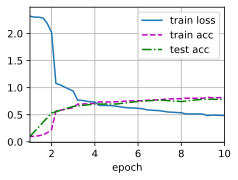

In [ ]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

## AlexNet


### 结构图
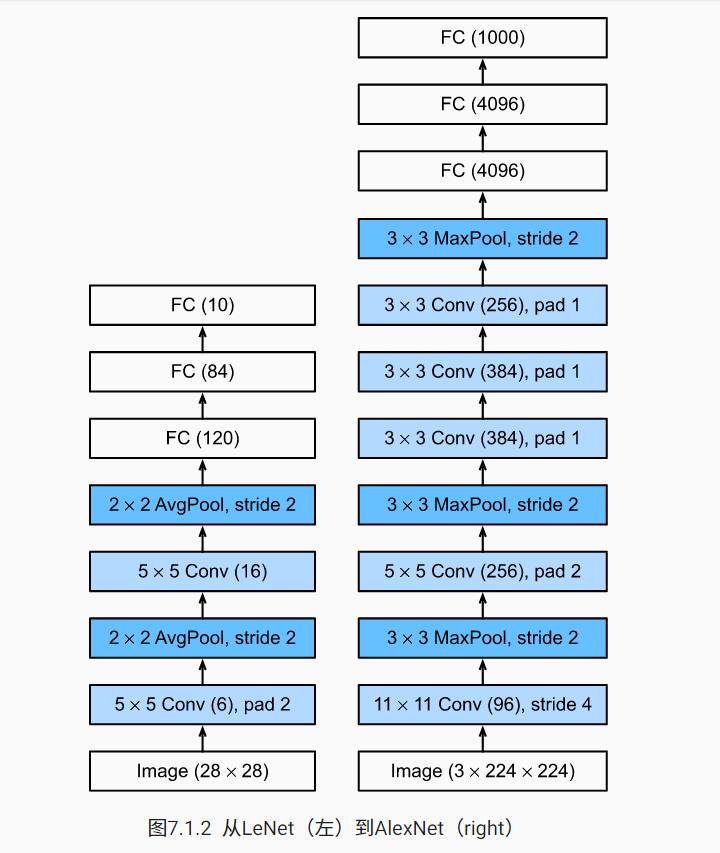

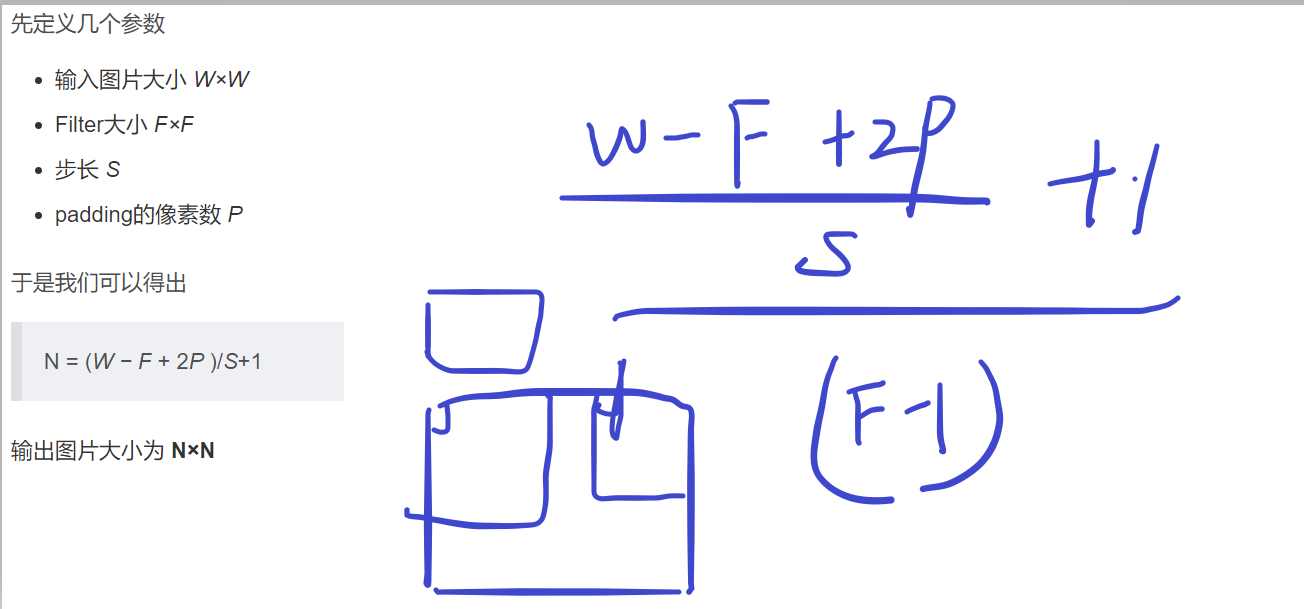

In [ ]:
import torch 
from torch import nn


In [ ]:
net = nn.Sequential(
      nn.Conv2d(3,96,kernel_size=11,stride=4,padding=2),nn.ReLU(),
      nn.MaxPool2d(kernel_size=3,stride=2), # 
      nn.Conv2d(96,128*2,kernel_size=5,padding=2),nn.ReLU(),
      nn.MaxPool2d(kernel_size=3,stride=2),
      nn.Conv2d(128*2,192*2,kernel_size=3,padding=1),nn.ReLU(),
      nn.Conv2d(192*2,192*2,kernel_size=3,padding=1),nn.ReLU(),
      nn.Conv2d(192*2,128*2,kernel_size=3,padding=1),nn.ReLU(),
      nn.MaxPool2d(kernel_size=3,stride=2), # 6*6*256
      nn.Flatten(),
      nn.Linear(6*6*256,2048*2),nn.ReLU(),nn.Dropout(p=0.5),
      nn.Linear(2048*2,2048*2),nn.ReLU(),nn.Dropout(p=0.5),
      nn.Linear(2048*2,1000),nn.ReLU(),
    )

In [ ]:
X=torch.rand(size=(1,3,224,224),dtype=torch.float32)
for layer in net:
  X=layer(X)
  print(layer.__class__.__name__,"output shape：\t",X.shape)

Conv2d output shape：	 torch.Size([1, 96, 55, 55])
ReLU output shape：	 torch.Size([1, 96, 55, 55])
MaxPool2d output shape：	 torch.Size([1, 96, 27, 27])
Conv2d output shape：	 torch.Size([1, 256, 27, 27])
ReLU output shape：	 torch.Size([1, 256, 27, 27])
MaxPool2d output shape：	 torch.Size([1, 256, 13, 13])
Conv2d output shape：	 torch.Size([1, 384, 13, 13])
ReLU output shape：	 torch.Size([1, 384, 13, 13])
Conv2d output shape：	 torch.Size([1, 384, 13, 13])
ReLU output shape：	 torch.Size([1, 384, 13, 13])
Conv2d output shape：	 torch.Size([1, 256, 13, 13])
ReLU output shape：	 torch.Size([1, 256, 13, 13])
MaxPool2d output shape：	 torch.Size([1, 256, 6, 6])
Flatten output shape：	 torch.Size([1, 9216])
Linear output shape：	 torch.Size([1, 4096])
ReLU output shape：	 torch.Size([1, 4096])
Linear output shape：	 torch.Size([1, 4096])
ReLU output shape：	 torch.Size([1, 4096])
Linear output shape：	 torch.Size([1, 1000])
ReLU output shape：	 torch.Size([1, 1000])


## VGG

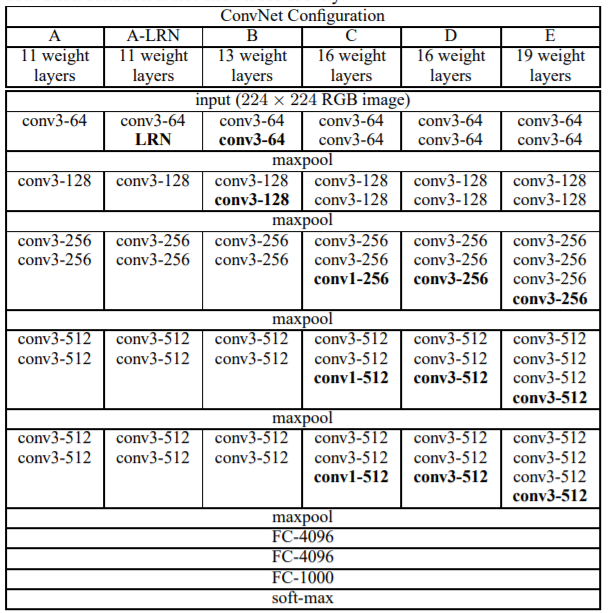

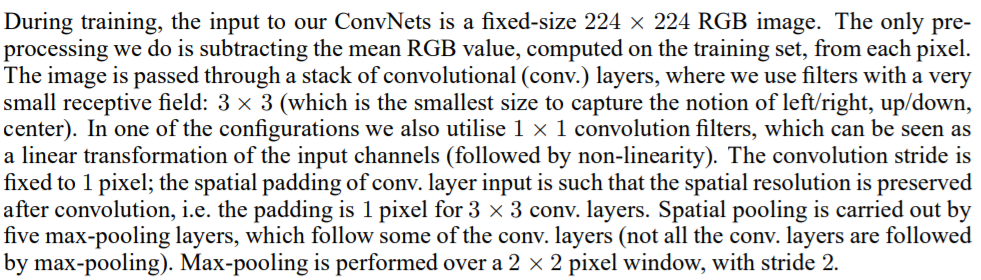

In [37]:
import torch 
from torch import nn

def vgg_block(num_conv,in_channels,out_channels) ->nn.Sequential:
  layers: List[nn.Module] = []
  for _ in range(num_conv):
    layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
    layers.append(nn.ReLU())
    in_channels = out_channels
  layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
  return nn.Sequential(*layers)

In [39]:
class vgg_net(nn.Module):
  def __init__(self,cfg:tuple,in_channels) -> None:
    super(vgg_net,self).__init__()
    layers: List[nn.Module] = []
    for num_conv,out_channels in cfg:
      layers.append(vgg_block(num_conv,in_channels,out_channels))
      in_channels = out_channels
    self.model = nn.Sequential(*layers,
                  nn.Flatten(),
                  nn.Linear(in_channels * 7 * 7,4096),nn.ReLU(),nn.Dropout(p=0.5),
                  nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
                  nn.Linear(4096,10)
                  )
  
  def forward(self,X:torch.Tensor):
    for layer in self.model:
      X=layer(X)
      print(layer.__class__.__name__,"output shape：\t",X.shape)
    print(X)
    return nn.Softmax(1)(X)


In [40]:
X=torch.rand(size=(1,3,224,224),dtype=torch.float32)
cfg = ((3,64),(1,128),(2,256),(2,512),(2,512))

net = vgg_net(cfg,in_channels=3)
net(X)



Sequential output shape：	 torch.Size([1, 64, 112, 112])
Sequential output shape：	 torch.Size([1, 128, 56, 56])
Sequential output shape：	 torch.Size([1, 256, 28, 28])
Sequential output shape：	 torch.Size([1, 512, 14, 14])
Sequential output shape：	 torch.Size([1, 512, 7, 7])
Flatten output shape：	 torch.Size([1, 25088])
Linear output shape：	 torch.Size([1, 4096])
ReLU output shape：	 torch.Size([1, 4096])
Dropout output shape：	 torch.Size([1, 4096])
Linear output shape：	 torch.Size([1, 4096])
ReLU output shape：	 torch.Size([1, 4096])
Dropout output shape：	 torch.Size([1, 4096])
Linear output shape：	 torch.Size([1, 10])
tensor([[-0.0228, -0.0124, -0.0116, -0.0104, -0.0109, -0.0094, -0.0134,  0.0005,
         -0.0139,  0.0102]], grad_fn=<AddmmBackward>)


tensor([[0.0987, 0.0997, 0.0998, 0.0999, 0.0999, 0.1000, 0.0996, 0.1010, 0.0995,
         0.1020]], grad_fn=<SoftmaxBackward>)